In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [193]:
bias = -1000

X, y, coef= make_regression(n_samples=1000, n_features=10, noise=10, bias=bias, random_state=42, coef=True)

In [194]:
X.shape

(1000, 10)

In [195]:
class LinearRegCustom:
    
    def __init__(self, lr=.1):
        self.lr = lr
        
    def fit(self, X, y):
        
        self.__X = X
        self.__y = y.reshape(-1, 1)
        self.n_features = X.shape[1]
        
        self.coef_ = np.random.randn(self.n_features)
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(100):
            self.gradient_decend()
            errors.append(self.error())
#             print(self.coef_, self.intercept_)
            
        return errors
            
        
    def gradient_decend(self):
        
        d_coef, d_intercept = self.gradient()
        
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
        
    def gradient(self):
        
        yh = self.predict(self.__X)
        # from derivation
        d_coef = np.dot((yh-self.__y).T, self.__X).flatten() / self.__X.shape[0]
        d_intercept = (yh-self.__y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return np.sum((X * self.coef_), axis=1, keepdims=True) + self.intercept_
    
    def error(self):
        return ((self.predict(self.__X) - self.__y) ** 2).sum()
    
    

[ 88.50261722  46.12319049   9.49103965  39.65693741  13.27429119
  13.36605986  68.40008811  -9.19074017 -42.81317209  51.30401865] -988.5699613753386
[33.6926875  32.12551734 29.43481665 75.31997019  7.18075454 10.30191944
 76.33080772  9.42759779  5.16621758 58.28693612] -1000


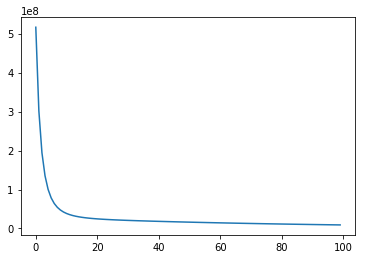

In [196]:
model = LinearRegCustom(lr=1.7)
errors = model.fit(X, y)
print(model.coef_, model.intercept_)
print(coef, bias)
plt.plot(errors)

In [197]:
model.error()

9194068.962269966

In [198]:
((y - (np.sum((X * coef), axis=1) + bias)) ** 2).sum()

94313.23040196739

In [199]:
model.error()

9194068.962269966